# First part : Predicting house prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Chargement des données
house = pd.read_csv('houses.csv', index_col=0)

In [4]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6681,3.500,3,2.25,1860,8378,2.0,0.0,0.0,3,7,1860,0,1995,0.0,98038,47.3875,-122.032,1870,8378
17798,5.925,4,3.00,2170,8240,1.0,0.0,0.0,4,8,1370,800,1968,0.0,98052,47.6291,-122.093,2020,7944
18854,2.555,2,1.00,1440,43560,1.0,0.0,0.0,4,7,1150,290,1965,0.0,98027,47.4916,-122.082,1870,56628
13478,13.300,4,2.25,3260,4640,2.0,0.0,0.0,5,9,2360,900,1907,0.0,98112,47.6272,-122.312,3240,5800
10509,3.891,2,1.00,840,5400,1.0,0.0,0.0,4,7,840,0,1948,0.0,98118,47.5489,-122.271,1340,5400


In [5]:
#Variable cible (target)
target = house['price']
#Variables explicatives (features)
features = house.drop(columns=['price'])


# Etude statistique

In [6]:
# Affichage des statistiques descriptives
house.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,13397.000000,13397.000000,13397.000000,13397.000000,1.339700e+04,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,5.411905,3.379861,2.122509,2085.261775,1.525303e+04,1.495185,0.006867,0.225648,3.412406,7.662312,1792.022542,293.030604,1971.132642,83.006494,98077.574756,47.559242,-122.213414,1987.884750,12774.004180
std,3.727862,0.938934,0.764619,919.172404,3.973164e+04,0.539493,0.082587,0.752068,0.652101,1.168484,827.231993,443.115894,29.360525,398.562717,53.391212,0.138897,0.140730,680.418605,25855.329281
min,0.820000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.220000,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.469300,-122.328000,1490.000000,5100.000000
50%,4.500000,3.000000,2.250000,1920.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1564.000000,0.000000,1975.000000,0.000000,98065.000000,47.571500,-122.229000,1840.000000,7620.000000
75%,6.440000,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.677500,-122.123000,2360.000000,10091.000000
max,77.000000,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,434728.000000


In [15]:

# Cherchons la variable la plus corrélée
correlation_matrix = house.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
price_corr=price_correlation.drop('price')
price_corr

sqft_living      0.704557
grade            0.660685
sqft_above       0.612141
sqft_living15    0.579687
bathrooms        0.526215
view             0.388199
sqft_basement    0.313674
lat              0.308731
bedrooms         0.303073
waterfront       0.271284
floors           0.258322
yr_renovated     0.118584
sqft_lot         0.086770
sqft_lot15       0.077270
yr_built         0.042693
condition        0.032885
long             0.015186
zipcode         -0.043153
Name: price, dtype: float64

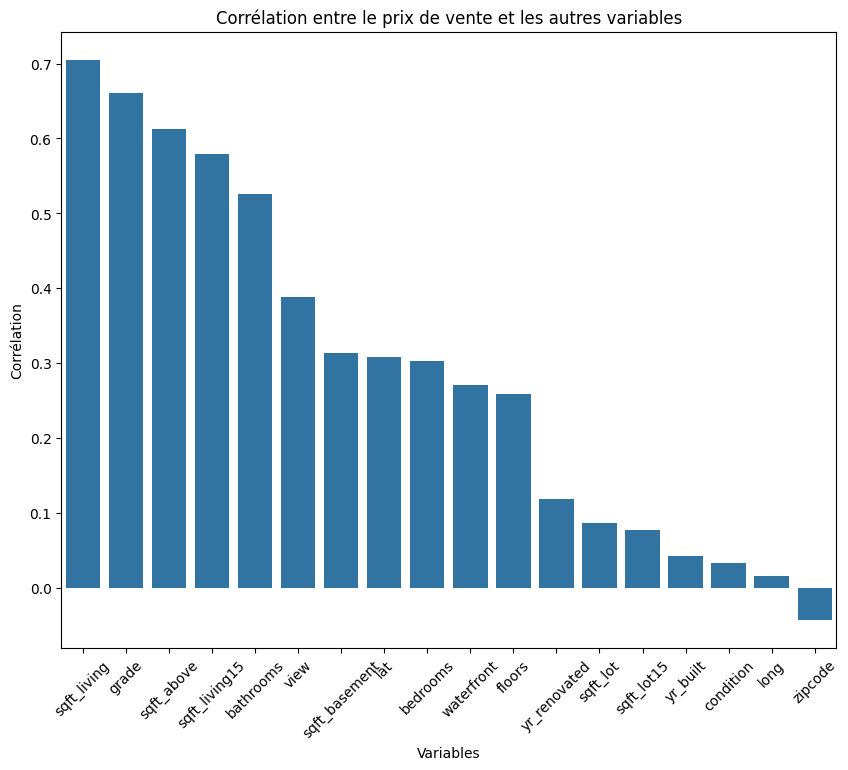

In [16]:
# Affichage de la corrélation entre price et les autres variables



plt.figure(figsize=(10, 8))
sns.barplot(x=price_corr.index, y=price_corr.values)
plt.title('Corrélation entre le prix de vente et les autres variables')
plt.xlabel('Variables')
plt.ylabel('Corrélation')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calcul de la matrice de corrélation
correlation_matrix = house.corr(numeric_only=True)

# Extraction de la corrélation avec la cible 'price'
price_correlation = correlation_matrix['price'].drop('price')

# Sélection des variables avec une corrélation significative
significant_correlation = price_correlation[abs(price_correlation) > 0.2]

# Affichage des variables conservées
display(significant_correlation.sort_values(ascending=False))


sqft_living      0.704557
grade            0.660685
sqft_above       0.612141
sqft_living15    0.579687
bathrooms        0.526215
view             0.388199
sqft_basement    0.313674
lat              0.308731
bedrooms         0.303073
waterfront       0.271284
floors           0.258322
Name: price, dtype: float64

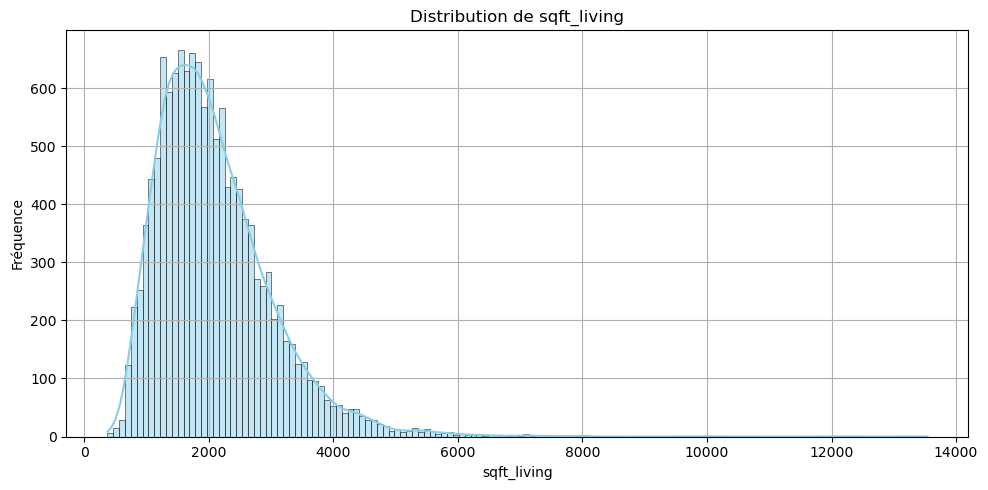

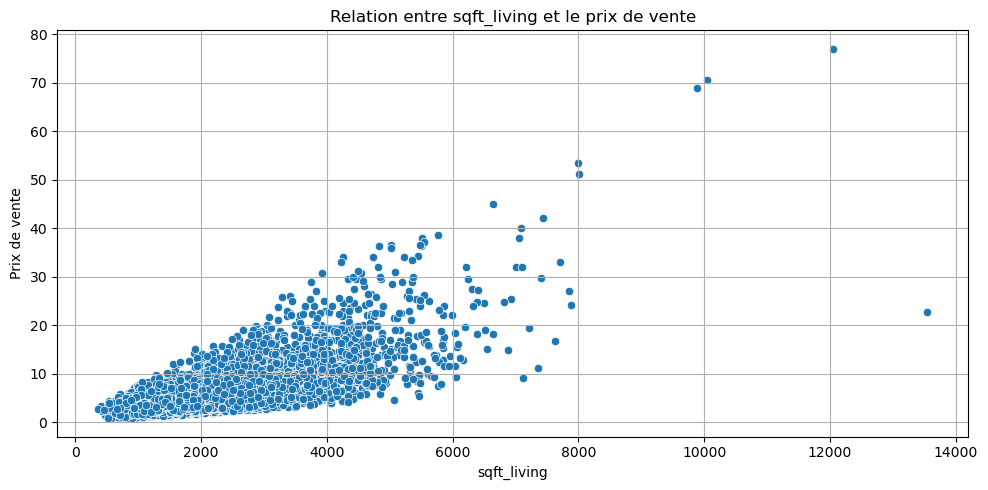

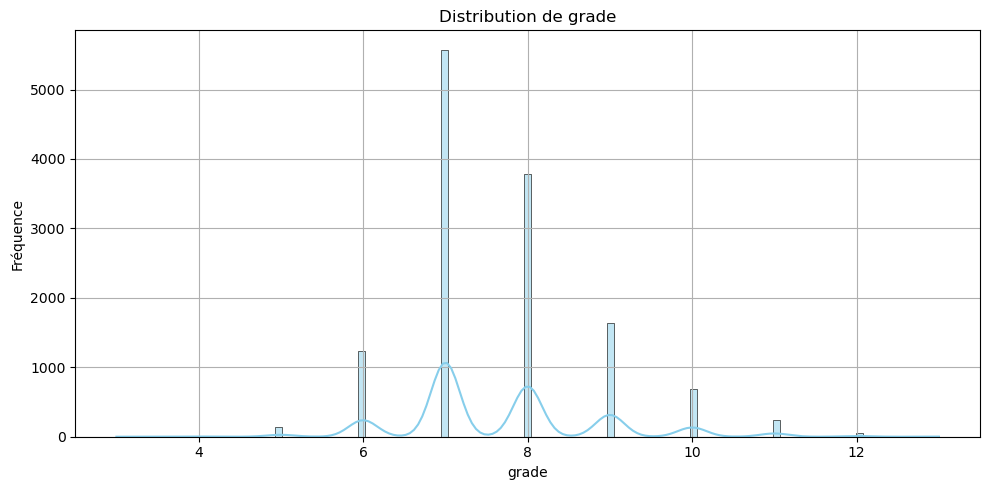

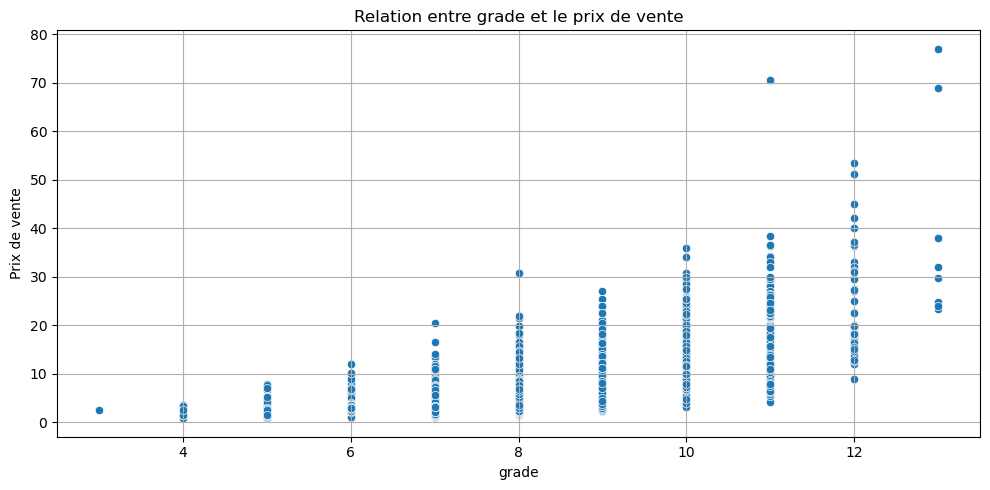

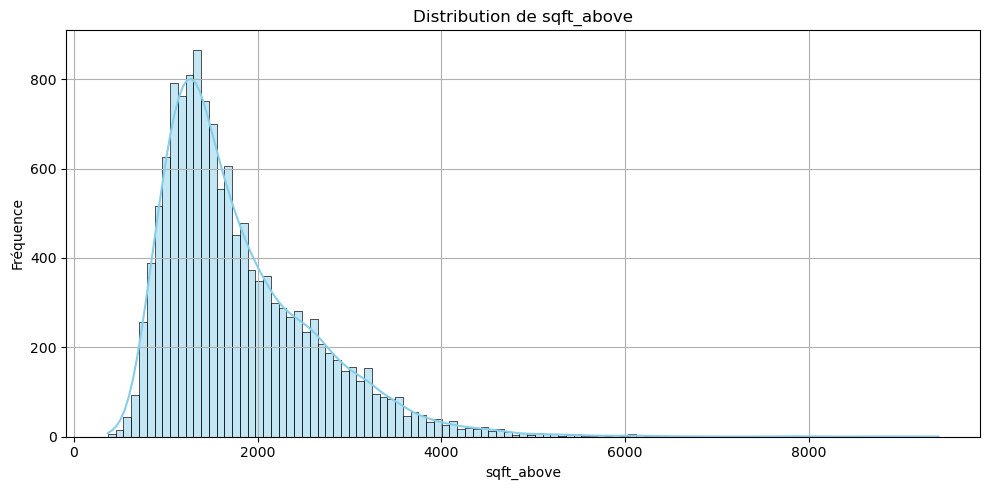

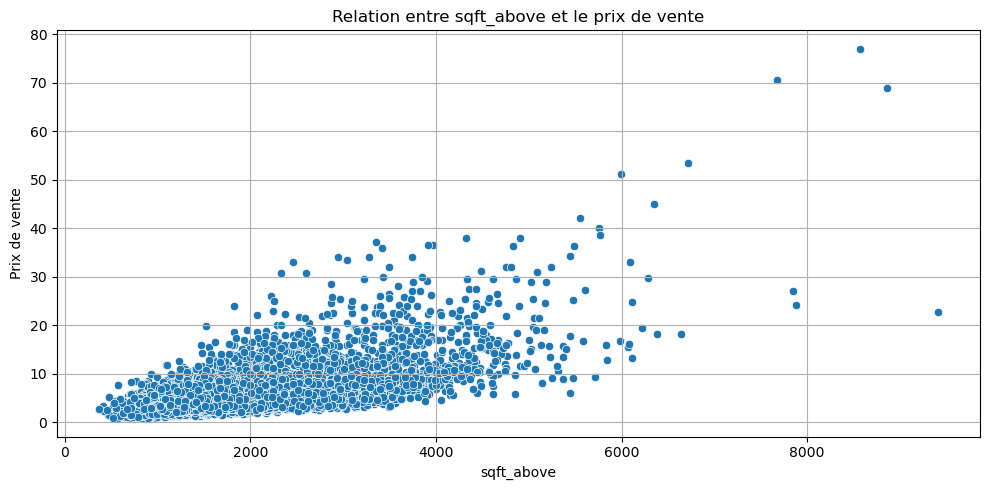

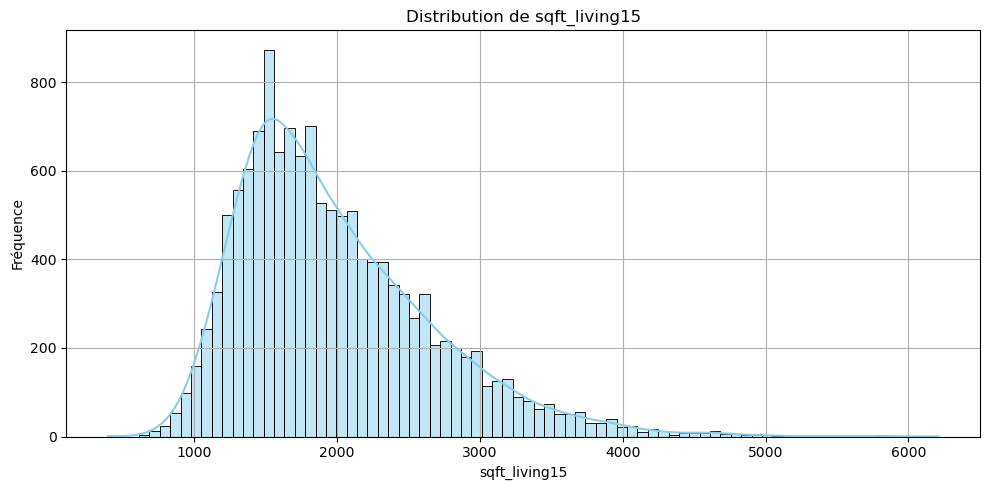

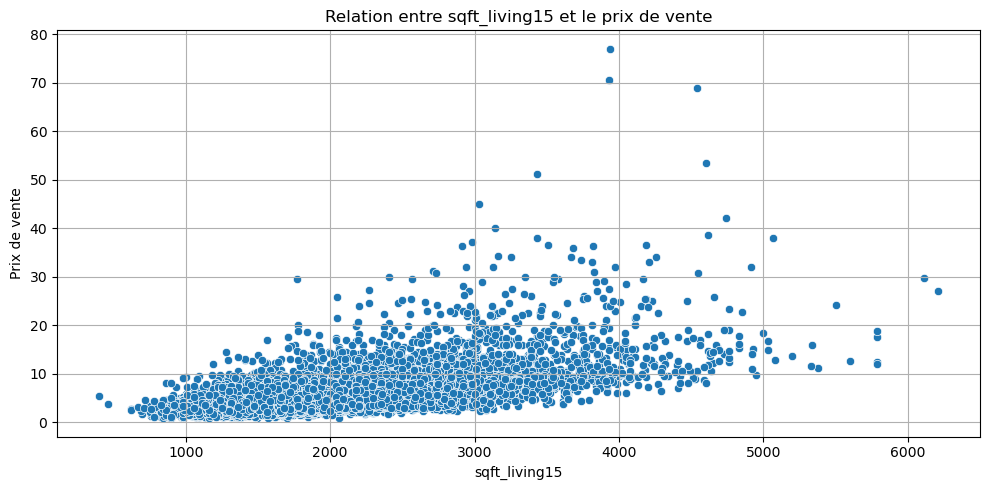

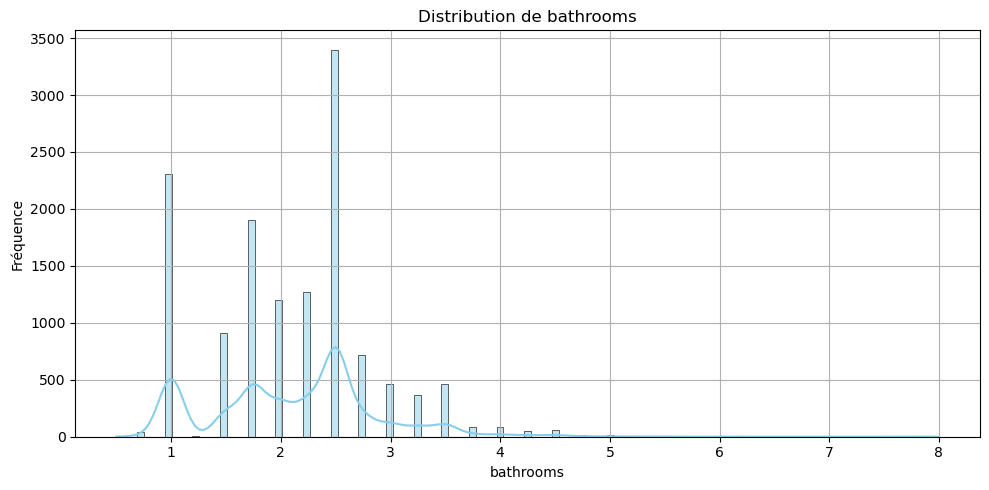

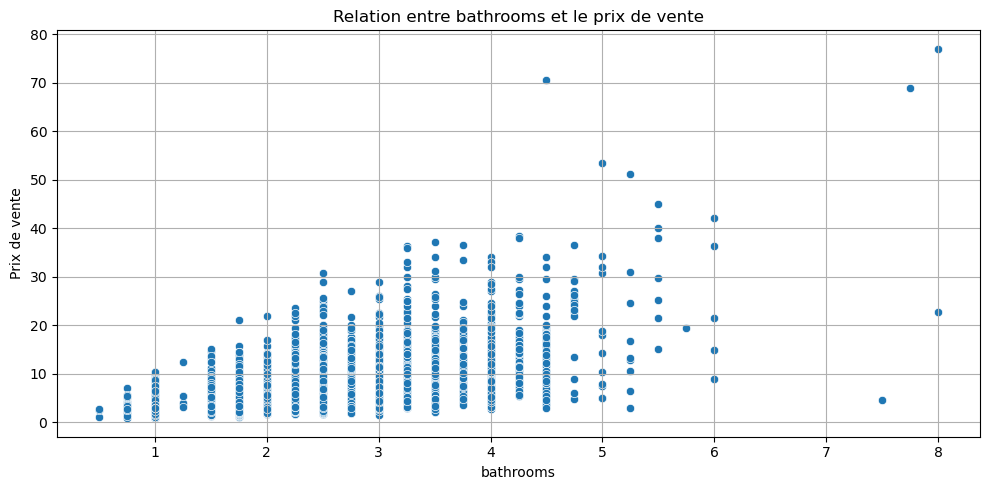

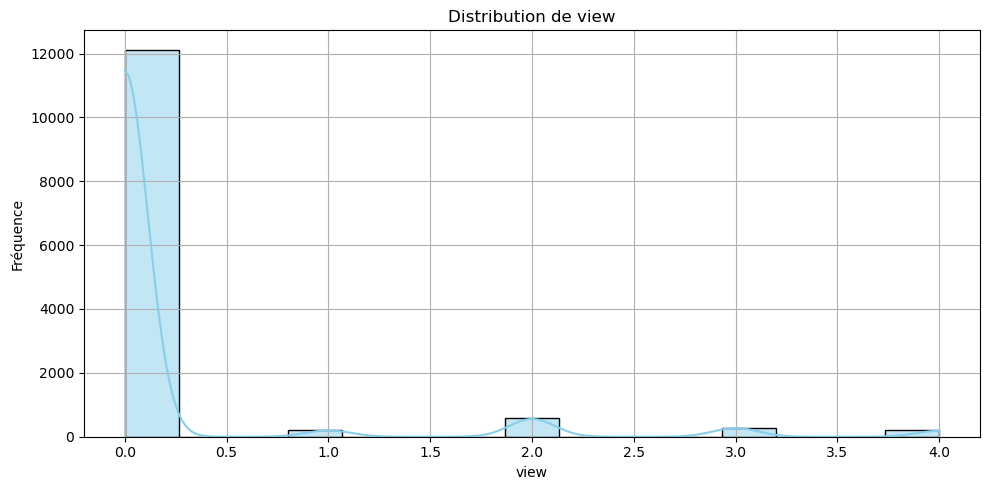

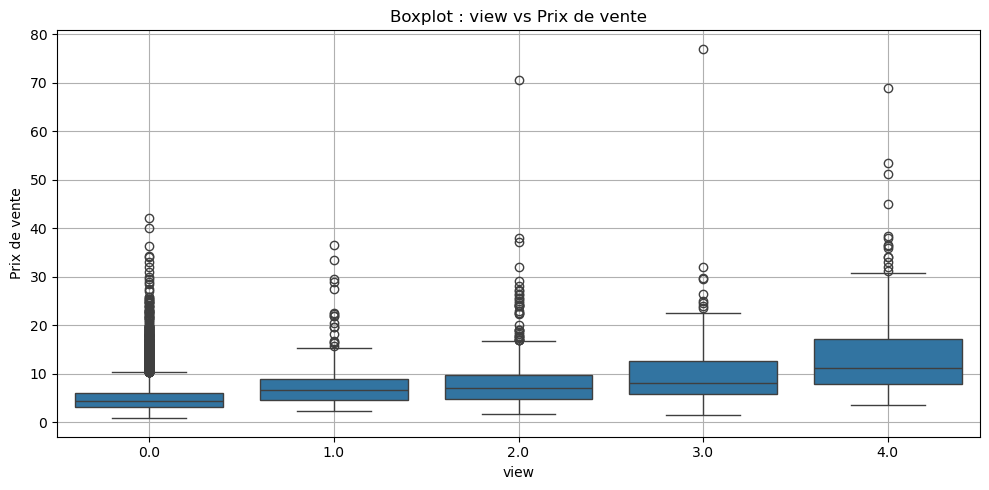

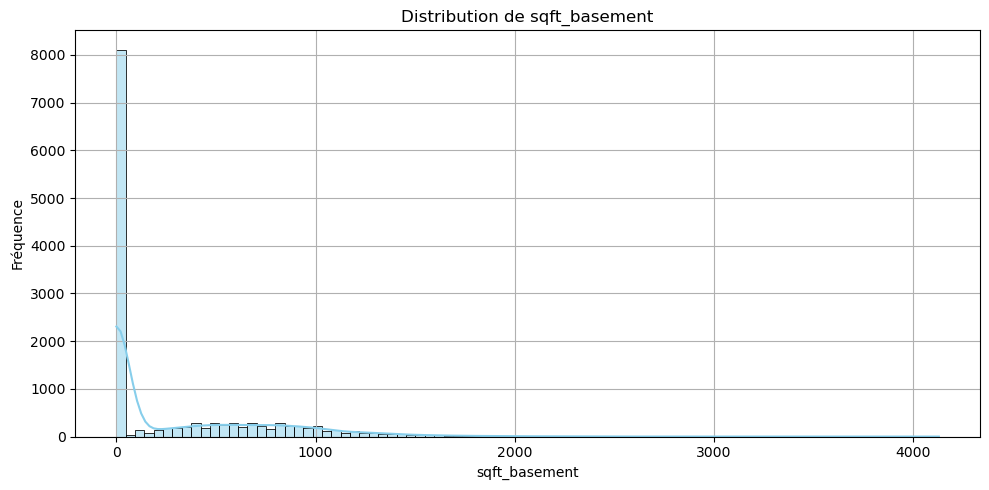

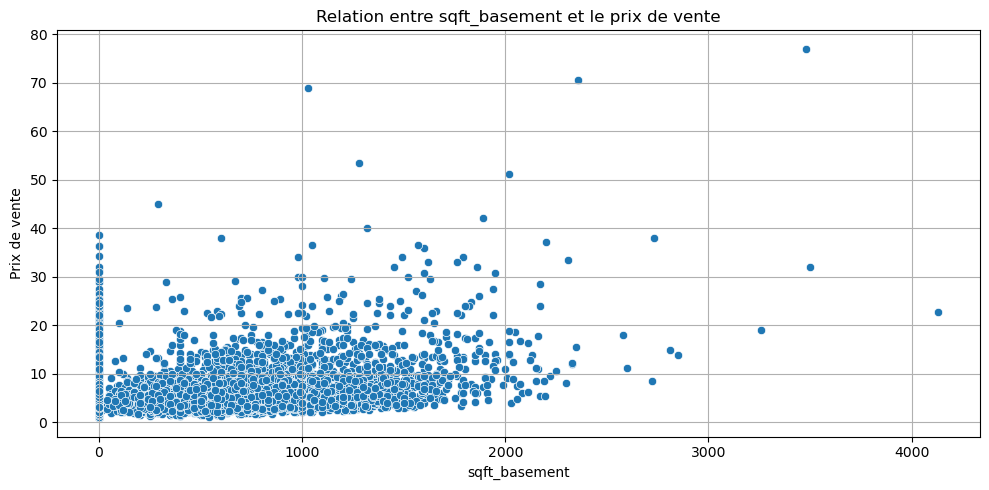

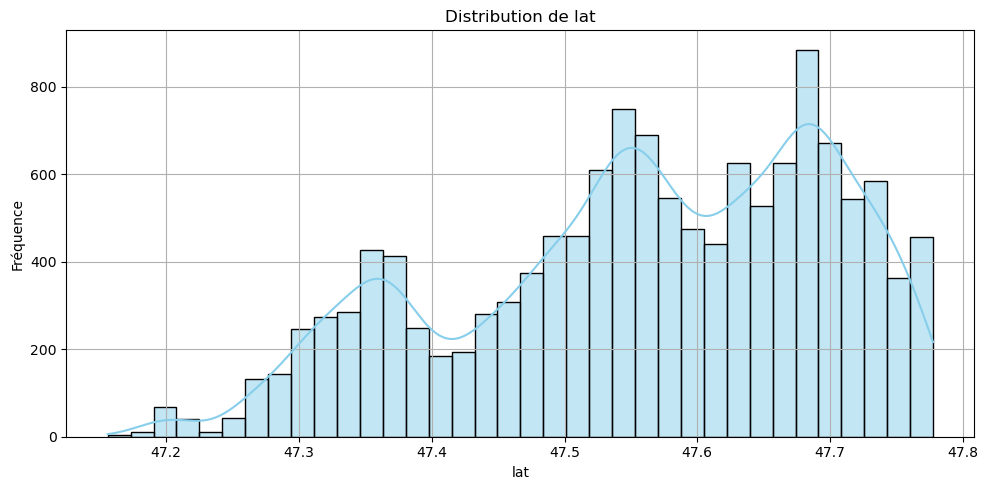

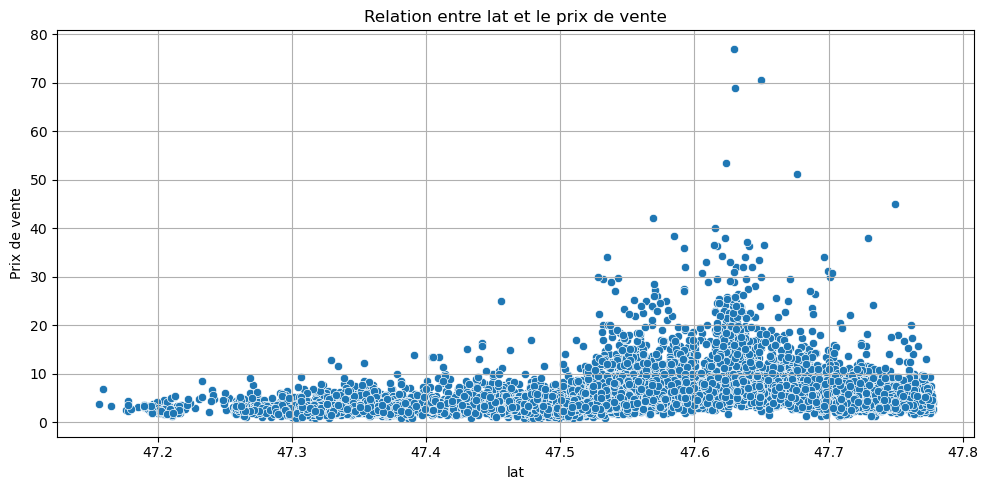

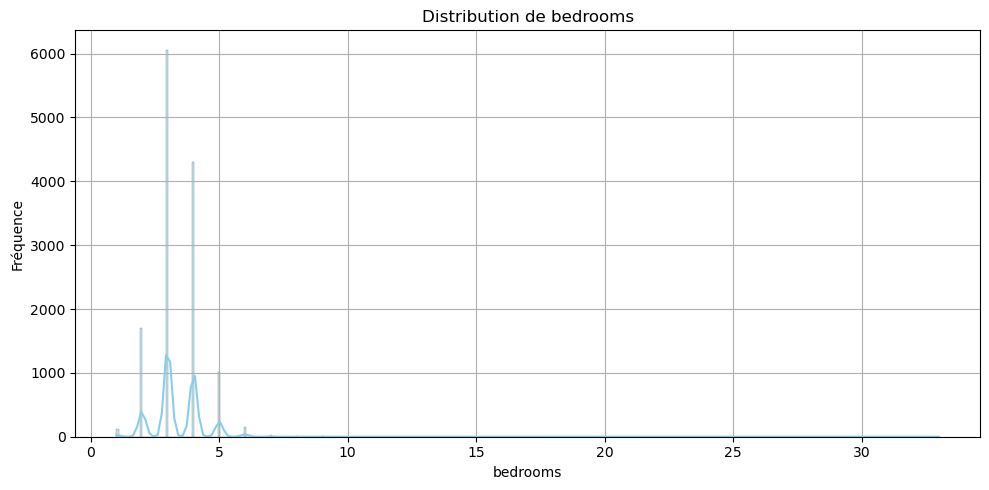

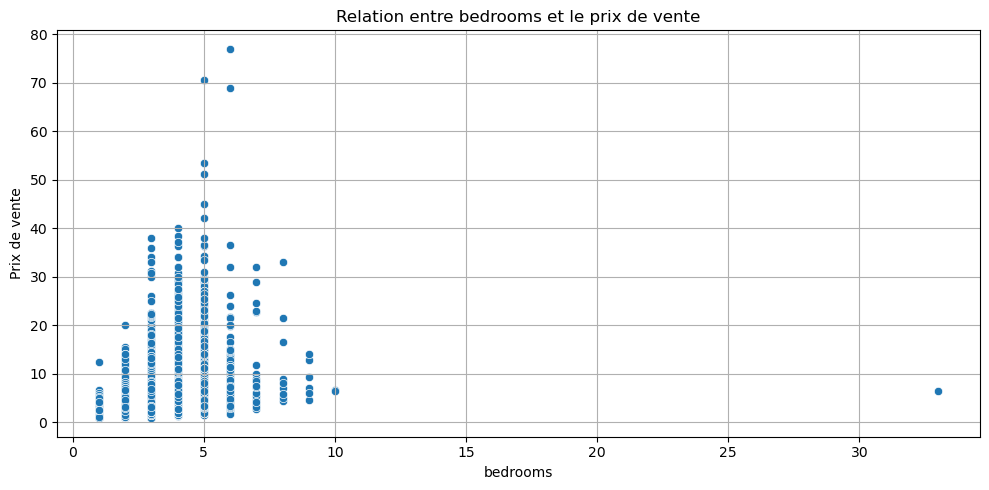

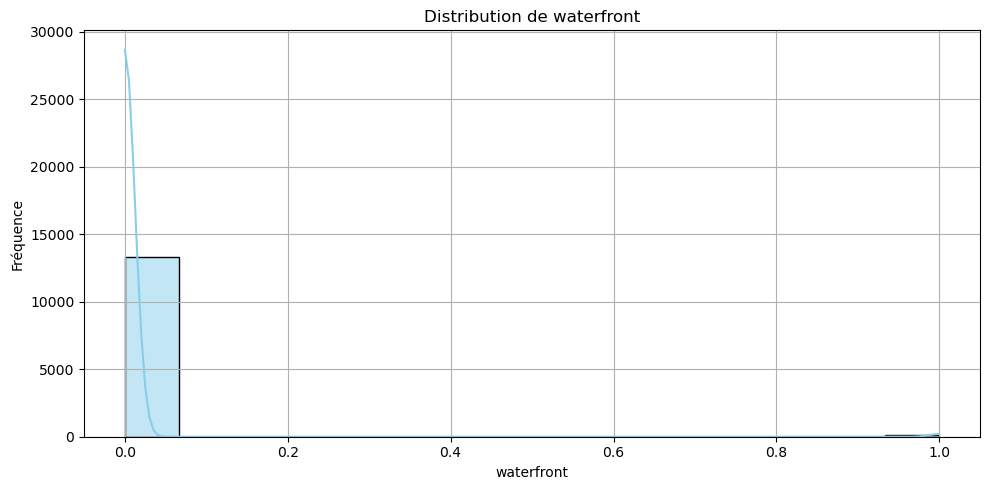

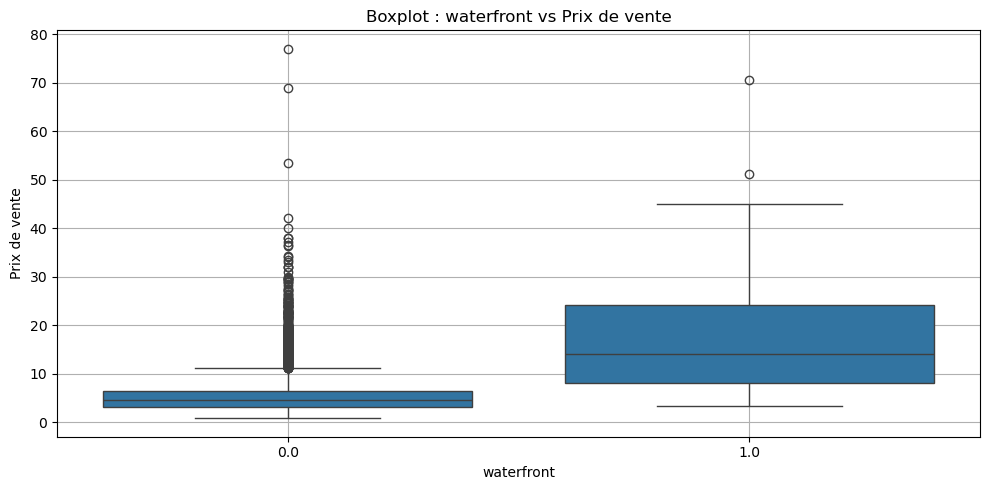

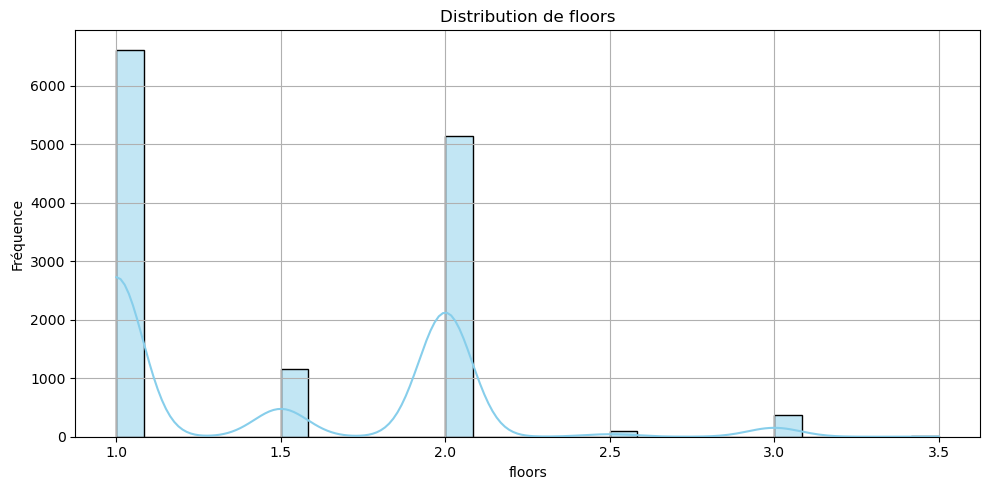

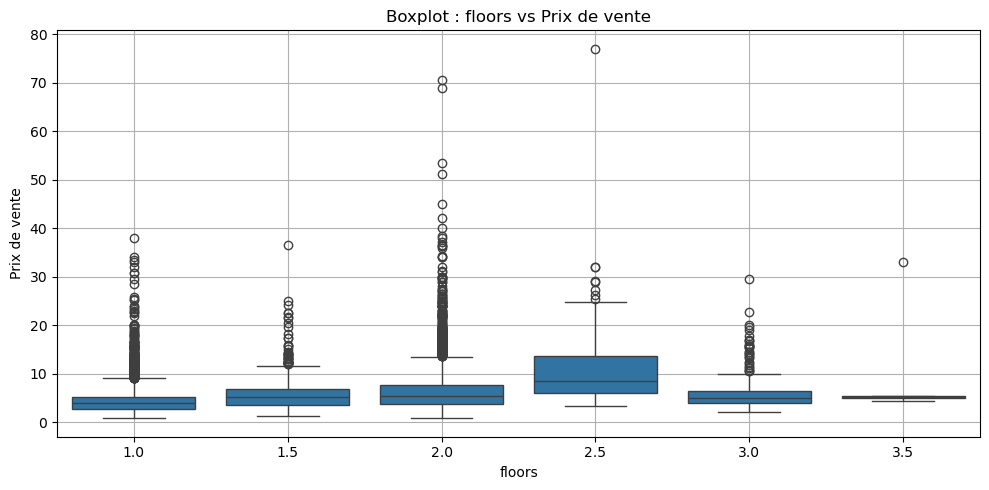

In [ ]:
#Variables selectionnees avec une corrélation significative
selected_variables = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms','view', 'sqft_basement', 'lat', 'bedrooms', 'waterfront', 'floors']
# Analyse des variables sélectionnées
for var in selected_variables:

    plt.figure(figsize=(10, 5))
    sns.histplot(house[var], kde=True, color="skyblue")
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Relation avec le prix de vente
    if pd.api.types.is_numeric_dtype(house[var]) and house[var].nunique() > 10:
        # Cas variable numérique continue → scatterplot
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=var, y='price', data=house)
        plt.title(f'Relation entre {var} et le prix de vente')
        plt.xlabel(var)
        plt.ylabel('Prix de vente')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        # Cas variable catégorique ou discrète → boxplot
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=var, y='price', data=house)
        plt.title(f'Boxplot : {var} vs Prix de vente')
        plt.xlabel(var)
        plt.ylabel('Prix de vente')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [ ]:
# Analyse de la variance des variables
variance_analysis = house[selected_variables].var()
print("Analyse de la variance des variables :")
variance_analysis

Analyse de la variance des variables :


sqft_living      844877.907954
grade                 1.365355
sqft_above       684312.770916
sqft_living15    462969.478356
bathrooms             0.584642
view                  0.565607
sqft_basement    196351.695241
lat                   0.019292
bedrooms              0.881598
waterfront            0.006821
floors                0.291053
dtype: float64

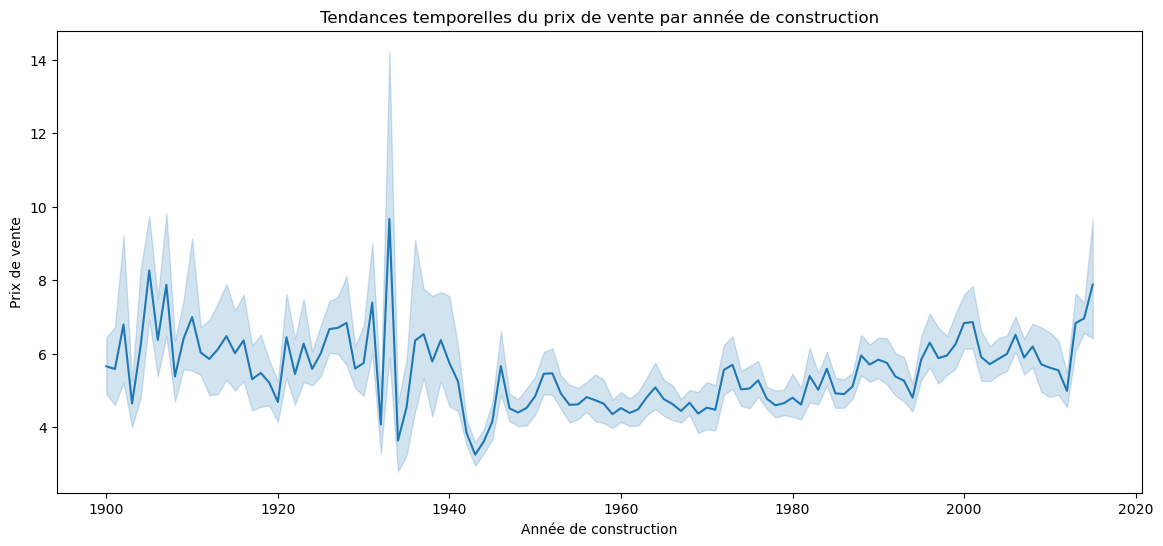

In [ ]:
# Analyse des tendances temporelles du prix de vente par année de construction
plt.figure(figsize=(14, 6))
sns.lineplot(x='yr_built', y='price', data=house)
plt.title('Tendances temporelles du prix de vente par année de construction')
plt.xlabel('Année de construction')
plt.ylabel('Prix de vente')
plt.show()

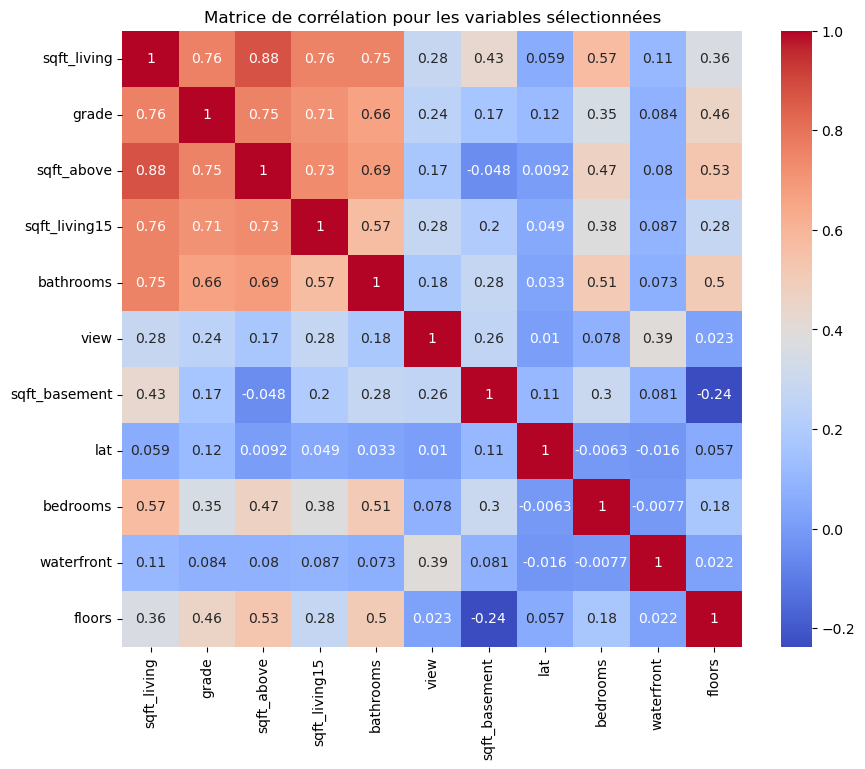

In [ ]:
# Afficher une heatmap de corrélation pour les variables sélectionnées
plt.figure(figsize=(10, 8))
sns.heatmap(house[selected_variables].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation pour les variables sélectionnées')
plt.show()

# First Part: Regression Lineaire

In [ ]:
# Séparation Train / Test split
train, test = train_test_split(house, test_size=0.25, random_state=20)

In [ ]:
def best_variable(data):
    """
    Sélectionne la meilleure variable prédictive individuelle pour 'price',
    en se basant sur le R², I_r et la significativité du coefficient (p-value).
    """
    # Meilleurs critères initiaux
    best_r_squared = -np.inf
    best_ir = np.inf
    best_p_value = np.inf
    best_var = None

    # Liste des variables prédictives 
    predictors = [
        'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
        'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
    ]

    for var in predictors:
        X = sm.add_constant(data[[var]])  # X doit être un DataFrame
        Y = data['price']
        model = sm.OLS(Y, X).fit()

        r_squared = model.rsquared
        ir = np.sum(model.resid ** 2)
        p_value = model.pvalues[1]  # Coefficient de la variable (hors constante)

        # Mise à jour si meilleure variable trouvée
        if (r_squared > best_r_squared) or (
            r_squared == best_r_squared and (ir < best_ir or p_value < best_p_value)
        ):
            best_r_squared = r_squared
            best_ir = ir
            best_p_value = p_value
            best_var = var

    print(f"Meilleure variable prédictive individuelle : '{best_var}'")
    print(f"R² : {best_r_squared:.4f}")
    print(f"Somme des résidus (I_r) : {best_ir:.2f}")
    print(f"p-value associée : {best_p_value:.4f}")


In [ ]:
best_variable(house)

Meilleure variable prédictive individuelle : 'sqft_living'
R² : 0.4964
Somme des résidus (I_r) : 93751.78
p-value associée : 0.0000


In [ ]:
X = train.loc[:,['sqft_living']] 
X = sm.add_constant(X) 
Y = train.loc[:,['price']]
model = sm.OLS(Y, X).fit() 
# Then, we will prepare the new data so that it is under the same form as the data used to create the model,
# i.e. one constant column and one column with x1 values for the new data
X_new = test.loc[:,['sqft_living']] # only the x1 column of the new dataset
X_new = sm.add_constant(X_new) # add the constant column
# and then we can easily predict y for this new dataset:
y_pred = model.predict(X_new)
# You can see the predictions fo
y_pred

16580    10.185105
13353     4.647327
19767     3.929998
17394     4.102157
19918     6.799313
           ...    
7828      6.426302
10680     6.259882
4367      3.786532
8884      4.589941
3705      6.368916
Length: 3350, dtype: float64

In [ ]:
#Calcul Mean Squared Error 
mean_squared_error(test.iloc[:,0],y_pred) 

7.001875041181126

# Regression multiple

In [ ]:
X = train.iloc[:,1:18] # select columns of index 1 and 2 (i.e. x1 and x2)
X = sm.add_constant(X)
Y = train.loc[:,"price"]
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1387.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:24:36   Log-Likelihood:                -21448.
No. Observations:               10047   AIC:                         4.293e+04
Df Residuals:                   10029   BIC:                         4.306e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            48.8264     43.582      1.120      0.263     -36.603     134.256
bedrooms         -0.3621      0.027    -13.282      0.000      -0.416      -0.309
bathrooms         0.4300      0.049      8.844      0.000       0.335       0.525
sqft_living       0.0019      0.000      7.388      0.000       0.001       0.002
sqft_lot      -1.005e-06   5.39e-07     -1.866      0.062   -2.06e-06    5.07e-08
floors            0.1178      0.054      2.187      0.029       0.012       0.223
waterfront        6.7208      0.273     24.626      0.000       6.186       7.256
view              0.5063      0.033     15.517      0.000       0.442       0.570
condition         0.2284      0.035      6.528      0.000       0.160       0.297
grade             0.9532      0.032     29.551      0.000       0.890       1.016
sqft_above    -1.129e-05      0.000     -0.045      0.964      -0.001       0.000
sqft_basement    -0.0002      0.000     -0.891      0.373      -0.001       0.000
yr_built         -0.0269      0.001    -25.002      0.000      -0.029      -0.025
yr_renovated      0.0002    5.4e-05      3.833      0.000       0.000       0.000
zipcode          -0.0057      0.000    -11.556      0.000      -0.007      -0.005
lat               5.9418      0.160     37.206      0.000       5.629       6.255
long             -2.2226      0.196    -11.349      0.000      -2.607      -1.839
sqft_living15     0.0002   5.21e-05      3.683      0.000    8.98e-05       0.000
==============================================================================
Omnibus:                     8997.854   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1042070.295
Skew:                           3.830   Prob(JB):                         0.00
Kurtosis:                      52.301   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = test.iloc[:,1:18]
X_new = sm.add_constant(X)
y_pred = model.predict(X_new)
y_pred

16580    10.669091
13353     4.793848
19767     4.934887
17394     5.074092
19918     3.840373
           ...    
7828      7.672777
10680     4.023112
4367      4.577226
8884      5.317874
3705      5.398677
Length: 3350, dtype: float64

In [ ]:
# MSE
mean_squared_error(test.iloc[:,0],y_pred)

4.24647262691736

# Variable selection

-  Méthode exhaustive

In [ ]:
def my_regression_error_adjusted(data, idx_p, idx_t):
    # Récupération des colonnes prédictives selon leurs indices
    X = data.iloc[:, idx_p]

    # Ajout d'une constante pour le biais
    X = sm.add_constant(X)

    # Cible selon l'indice donné
    Y = data.iloc[:, idx_t]

    # Entraînement du modèle OLS
    mod = sm.OLS(Y, X).fit()

    # Retourne le R² ajusté
    return mod.rsquared_adj


In [ ]:
def step_selection_adj(train, v_s, v_nu, idx_t) : 
    r_adjust = 0
    selected_index = -1
    result = []
    
    for j in v_nu:
        if j != idx_t:
            [2]
            variables = v_s.copy()
            variables.append(j)
            r_computed = my_regression_error_adjusted(train, variables, idx_t)
            
            if(r_computed>r_adjust):
                r_adjust = r_computed
                selected_index = j
                
    return [selected_index]

In [ ]:
def forward_selection_adj(train, idx_p, idx_t):
    old_r_adjusted = 0
    actual_r_adjusted = 0
    v_s = []
    v_nu = idx_p
    
    best_var = step_selection_adj(train, [],idx_p,idx_t)
    
    v_s = v_s + best_var

    v_nu = list(set(v_nu) - set(best_var))
    old_r_adjusted = my_regression_error_adjusted(train, v_s, idx_t)
    while len(v_nu) > 0:
        
        # On cherche la meilleure variable à ajouter
        best_var = step_selection_adj(train, v_s, v_nu, idx_t)
        
        # On l'ajoute à la liste des variables sélectionnées
        v_s = v_s + best_var 
        
        # On retire cette variable de la liste des variables candidates
        v_nu = list(set(v_nu) - set(best_var))
        
        # On calcule le R² ajusté
        actual_r_adjusted = my_regression_error_adjusted(train, v_s, idx_t)
        
        # Si le R² ajusté a augmenté, on continue
        if actual_r_adjusted > old_r_adjusted:
            old_r_adjusted = actual_r_adjusted
        else:
            # Sinon, on retire la dernière variable ajoutée et on arrête
            v_s = list(set(v_s) - set(best_var))
            break
    for j in v_nu:
        
        best_var = step_selection_adj(train,v_s,v_nu, idx_t)
        v_s = v_s + best_var 
        v_nu = list(set(v_nu) - set(best_var))
        actual_r_adjusted = my_regression_error_adjusted(train, v_s, idx_t)
        
        
        if  actual_r_adjusted > old_r_adjusted:
            old_r_adjusted = actual_r_adjusted
        else :
            v_s = list(set(v_s) - set(best_var))
            break
        
    return v_s

In [ ]:
index=[]
for i in range(1,19):
    index.append(i)
v_s = forward_selection_adj(train, index, 0) 
v_s

[1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18]

In [ ]:
def my_regression(data, idx_p, idx_t):
    X = data.iloc[:,idx_p] 
    X = sm.add_constant(X) 
    Y = data.iloc[:,idx_t]
    mod = sm.OLS(Y, X).fit()
    return mod

def my_prediction(my_model, data):
    
    predictors = my_model.model.exog_names
    predictors = [p for p in predictors if p != 'const']
    
    # Select and add a constant to the predictors' data
    X_new = data[predictors]
    X_new = sm.add_constant(X_new)
    
    predictions = my_model.predict(X_new)
    
    return predictions



def generalization_error_split(train, test, idx_p, idx_t):

    
    mod =my_regression(train,idx_p,idx_t)
    pred = my_prediction(mod,test)
    diff = pred-test.iloc[:,idx_t]
    I_r = np.mean(diff**2)
    
    return I_r

In [ ]:
#  Erreur de generalisation
Eg_exhaustive = generalization_error_split(train, test, v_s, 0)
Eg_exhaustive

4.245230688338941

- Forward search

In [ ]:
def step_selection_generalization(train, v_s, v_nu, idx_t) : 
    
    r_adjust = float('inf')
    selected_index = -1
    result = []
        
    for j in v_nu:
        if j != idx_t:
            variables = v_s.copy()
            variables.append(j)
            r_computed = generalization_error_split(train,test, variables, idx_t)
            print(variables,"  ",r_computed)
            if(r_computed<r_adjust):
                r_adjust = r_computed
                selected_index = j
            
    return [selected_index]

In [ ]:
def forward_selection(data, idx_p, idx_t, critical_prob=0.05):
    
    old_r_adjusted = float('inf')
    v_s = []
    v_nu = idx_p
    
    best_var = step_selection_generalization(data, [], idx_p, idx_t)
    v_s = v_s + best_var
    v_nu = list(set(v_nu) - set(best_var))
    old_r_adjusted = generalization_error_split(train, test, v_s, idx_t)

    for j in v_nu:
        best_var = step_selection_generalization(data, v_s, v_nu, idx_t)
        v_s = v_s + best_var
        v_nu = list(set(v_nu) - set(best_var))
        actual_r_adjusted = generalization_error_split(train, test, v_s, idx_t)
        
        # Vérifier la significativité de la variable ajoutée
        model = my_regression(data, v_s, idx_t)
        p_value = model.pvalues[j]
        significant = p_value < critical_prob
        
        if actual_r_adjusted < old_r_adjusted and significant:
            old_r_adjusted = actual_r_adjusted
        else:
            v_s = list(set(v_s) - set(best_var))
            break
        
    return v_s

In [ ]:
v_s = forward_selection(house, index, 0)
print("la liste de variable optimale est : ")
v_s

[1]    12.059417389125601
[2]    9.96804361158127
[3]    7.000956647444795
[4]    13.38038660414699
[5]    12.694493810439551
[6]    12.614776619778398
[7]    11.60475066818183
[8]    13.507166684102994
[9]    7.835886176165072
[10]    8.31993540446035
[11]    12.581072947150595
[12]    13.497305011354054
[13]    13.27741627361288
[14]    13.503045044490749
[15]    12.18105323486134
[16]    13.513537958868207
[17]    9.227548785773216
[18]    13.433941308507436
[3, 1]    6.851231624023739
[3, 2]    6.999258532825775
[3, 4]    6.993609029985035
[3, 5]    7.000844484544598
[3, 6]    6.52401931209904
[3, 7]    6.505393293144699
[3, 8]    6.882927004200119
[3, 9]    6.552819795125158
[3, 10]    7.010074320609221
[3, 11]    7.010294860985748
[3, 12]    6.47574397445407
[3, 13]    6.903922176859313
[3, 14]    6.862632939788502
[3, 15]    5.954942444967013
[3, 16]    6.6720928437401605
[3, 17]    6.93379252076245
[3, 18]    6.982484539202359
[3, 15, 1]    5.839876719813284
[3, 15, 2]    5.954

[1, 2, 3, 6, 7, 8, 9, 10, 12, 14, 15, 16]

In [ ]:
# Erreur de generalisation
Eg_forward = generalization_error_split(train, test, [1, 2, 3, 6, 7, 8, 9, 10, 12, 14, 15, 16], 0)
Eg_forward

4.2323468149235115

In [ ]:
# comparaison des deux précédentes méthodes

if Eg_forward < Eg_exhaustive:
    print("Le meilleur model est : la méthode Forward Seach")
elif Eg_exhaustive < Eg_forward: 
    print("Le meilleur model est : la méthode Exhaustive")

Le meilleur model est : la méthode Forward Seach


- Backward search


In [ ]:
def backward_selection(data, idx_p, idx_t, critical_prob=0.05):
    # Initialisation des variables
    v_s = idx_p.copy()  # Commencer avec toutes les variables
    best_error = float('inf')
    best_variables = v_s.copy()
    
    # Boucle de sélection arrière
    while len(v_s) > 1:  # Tant qu'il reste plus d'une variable
        # Sélectionner la variable à retirer de v_s pour minimiser l'erreur de généralisation
        min_error = float('inf')
        variable_to_remove = None
        for j in v_s:
            variables = v_s.copy()
            variables.remove(j)
            error = generalization_error_split(data, data, variables, idx_t)
            
            # Vérifier si toutes les variables sélectionnées sont significatives
            p_values = my_regression(data, variables, idx_t).pvalues[1:]  # Exclure l'intercept
            all_significant = all(p < critical_prob for p in p_values)
            
            # Vérifier si aucune des variables restantes n'est significative une fois retirée
            other_variables = set(v_s) - set([j])
            other_variables_significant = any(p < critical_prob for p in p_values if p in other_variables)
            
            # Vérifier si le critère d'arrêt est rempli
            if all_significant and not other_variables_significant:
                # Si oui, sélectionner cette variable pour la suppression
                variable_to_remove = j
                break
            
            # Si le critère d'arrêt n'est pas rempli, vérifier si l'erreur est la meilleure jusqu'à présent
            if error < min_error:
                min_error = error
                variable_to_remove = j
        
        # Si une meilleure variable à supprimer a été trouvée, mettre à jour v_s
        if variable_to_remove is not None:
            v_s.remove(variable_to_remove)
            
            # Vérifier si l'erreur de généralisation a diminué
            if min_error < best_error:
                best_error = min_error
                best_variables = v_s.copy()
            else:
                # Si l'erreur de généralisation a augmenté, arrêter la boucle
                break
        else:
            # Si aucune meilleure variable n'a été trouvée pour la suppression, arrêter la boucle
            break
    
    return best_variables

In [ ]:
# Use the backward selection function
best_variables_backward = backward_selection(house, index, 0)
print("Variables sélectionnées Backward :", best_variables_backward)

Variables sélectionnées Backward : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]


In [ ]:
# Generalization error
Eg_backward = generalization_error_split(train, test, [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18], 0)
Eg_backward

4.2448754616576965

In [ ]:
# comparaison

min_err = min(Eg_forward, Eg_exhaustive, Eg_backward)
if min_err == Eg_exhaustive:
    print("Le meilleur model est: la méthode Exhaustive")
elif min_err == Eg_forward:
    print("Le meilleur model est: la méthode Forward Seach")
else:
    print("Le meilleur model est: la méthode Backward Search")

Le meilleur model est: la méthode Forward Seach


- K-Fold

In [ ]:
def k_fold_cross_validation(data, model,idx_p, idx_t, min_k=4, max_k=30):
    best_mean_mse = float('inf')
    best_k = None

    for k in range(min_k, max_k + 1):
        kf = KFold(n_splits=k, shuffle=True, random_state=20)
        mses = []

        for train_index, test_index in kf.split(data):
            train_fold, test_fold = data.iloc[train_index], data.iloc[test_index]
            model_ = model(train_fold, idx_p, idx_t)
            y_pred = my_prediction(model_, test_fold)
            mse = mean_squared_error(test_fold.iloc[:, idx_t], y_pred)
            mses.append(mse)

        mean_mse = np.mean(mses)

        if mean_mse < best_mean_mse:
            best_mean_mse = mean_mse
            best_k = k

    return best_k, best_mean_mse


In [ ]:
best_k, best_mean_mse = k_fold_cross_validation(house, my_regression,index, 0)
print("Meilleur nombre de splits (k):", best_k)
print("Meilleur MSE moyen:", best_mean_mse)

Meilleur nombre de splits (k): 8
Meilleur MSE moyen: 4.22925226080198


In [ ]:
# comparaison

min_err = min(Eg_forward, Eg_exhaustive, Eg_backward, best_mean_mse)
if min_err == Eg_exhaustive:
    print("Le meilleur model est : méthode Exhaustive")
elif min_err == Eg_forward:
    print("Le meilleur model est : méthode Forward Seach")
elif min_err == best_mean_mse:
    print("Le meilleur model est : méthode de K-Fold")
else:
    print("Le meilleur model est : méthode Backward Search")

Le meilleur model est : méthode de K-Fold


- Modèles non linéaires

In [ ]:
def add_polynomial_feature(data, idx_p, power):
    new_data = data.copy(deep = True)
    for i in range(0, len(idx_p)):
        for j in power:
            for k in range(2, j+1):
                new_data['{}_pow_{}'.format(new_data.columns[idx_p[i]],k)] = new_data.iloc[:,idx_p[i]]**k
    return new_data

In [ ]:
train_poly = add_polynomial_feature(train, v_s, [2])
train_poly

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living_pow_2,waterfront_pow_2,view_pow_2,condition_pow_2,grade_pow_2,sqft_above_pow_2,yr_built_pow_2,zipcode_pow_2,lat_pow_2,long_pow_2
1859,4.05000,2,1.75,1710,4234,2.0,0.0,0.0,3,7,...,2924100,0.0,0.0,9,49,1768900,3686400,9630674496,2259.281518,14978.332996
13917,2.46000,3,1.50,1780,23819,1.0,0.0,0.0,3,7,...,3168400,0.0,0.0,9,49,3168400,3814209,9636956224,2255.414077,14960.225344
14909,13.40000,4,3.00,2760,4905,2.0,0.0,1.0,4,9,...,7617600,0.0,1.0,16,81,3385600,3755844,9624591025,2271.389813,14949.952900
19057,4.25000,3,2.50,2650,144183,1.0,0.0,0.0,3,8,...,7022500,0.0,0.0,9,64,7022500,3869089,9612233764,2248.770209,14919.156736
5436,6.38500,4,1.75,1770,12462,1.0,0.0,2.0,4,8,...,3132900,0.0,4.0,16,64,3132900,3849444,9636563556,2250.126660,14966.586244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21031,3.02059,4,2.00,1390,745,3.0,0.0,0.0,3,7,...,1932100,0.0,0.0,9,49,1932100,4032064,9609292729,2259.985044,14890.344676
10571,2.66200,3,1.50,1430,9600,1.0,0.0,0.0,4,7,...,2044900,0.0,0.0,16,49,2044900,3865156,9615567481,2253.752192,14920.622500
11483,4.55000,2,1.50,1020,1146,3.0,0.0,0.0,3,7,...,1040400,0.0,0.0,9,49,1040400,4004001,9626553225,2273.134471,14963.405625
21039,4.71275,4,2.50,3361,5038,2.0,0.0,0.0,3,9,...,11296321,0.0,0.0,9,81,11296321,4056196,9622040464,2239.835464,14924.287225


In [ ]:
test_poly = add_polynomial_feature(test, v_s, [2])
test_poly

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living_pow_2,waterfront_pow_2,view_pow_2,condition_pow_2,grade_pow_2,sqft_above_pow_2,yr_built_pow_2,zipcode_pow_2,lat_pow_2,long_pow_2
16580,13.1000,4,2.25,3750,5000,2.0,0.0,0.0,5,8,...,14062500,0.0,0.0,25,64,5953600,3701776,9626553225,2272.877020,14958.023809
13353,5.2500,4,1.75,1820,6600,1.0,0.0,0.0,5,7,...,3312400,0.0,0.0,25,49,3312400,3841600,9605372049,2266.331236,14916.958225
19767,4.1495,3,2.50,1570,1551,3.0,0.0,0.0,3,8,...,2464900,0.0,0.0,9,64,2464900,4032064,9624198609,2274.917955,14967.320281
17394,5.5700,3,2.50,1630,1587,3.0,0.0,0.0,3,8,...,2656900,0.0,0.0,9,64,2656900,4016016,9624983449,2272.362162,14980.046449
19918,3.3999,3,2.50,2570,4600,2.0,0.0,0.0,3,8,...,6604900,0.0,0.0,9,64,6604900,4056196,9622040464,2233.337467,14931.862416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,7.2500,4,2.75,2440,7042,1.5,0.0,2.0,4,7,...,5953600,0.0,4.0,16,49,2689600,3767481,9626749456,2263.199844,14983.718464
10680,3.4500,4,2.50,2382,5899,2.0,0.0,0.0,3,8,...,5673924,0.0,0.0,9,64,5673924,4044121,9604588009,2235.332208,14956.067025
4367,4.9995,4,1.75,1520,7700,1.0,0.0,0.0,4,7,...,2310400,0.0,0.0,16,49,2310400,3869089,9610665156,2278.687507,14930.640481
8884,4.4000,3,2.00,1800,10950,1.0,0.0,0.0,4,8,...,3240000,0.0,0.0,16,64,3240000,3928324,9605176036,2261.668249,14923.798569


In [ ]:
model_polynomial = my_regression(train_poly,index,0)
Eg_poly = generalization_error_split(train_poly, test_poly,index,0)
Eg_poly

4.245093045419049

In [ ]:
min_err = min(Eg_forward, Eg_exhaustive, Eg_poly, Eg_backward, best_mean_mse)
if min_err == Eg_exhaustive:
    print("Le meilleur model est :la méthode Exhaustive")
elif min_err == Eg_forward:
    print("Le meilleur model est :la méthode Forward Seach")
elif min_err == Eg_backward:
    print("Le meilleur model est :la méthode Backward Seach")
elif min_err == best_mean_mse:
    print("Le meilleur model est :la méthode de K-Fold")
else:
    print("Le meilleur model est :la méthode Non Lineair")

Le meilleur model est :la méthode de K-Fold


In [ ]:
model = my_regression(train, [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18], 0)
houses_competition=pd.read_csv('houses_competition.csv', index_col=0)

pred = my_prediction(model, houses_competition)
pred

15529     3.909185
3233      3.417360
14381     6.119442
3201     12.273636
3425      2.012658
           ...    
7989      5.020793
9973      3.611612
9007      4.079590
16345    13.813133
13582     0.293924
Length: 2365, dtype: float64

In [ ]:
model = my_regression (train_poly,index,0)
houses_competition = pd.read_csv('houses_competition.csv', index_col=0)

pred = my_prediction(model,houses_competition)
pred = pd.DataFrame ({'ID': pred.index, 'price': pred})
pred.to_csv ('my_submission2.csv', index = False)

# SERIES TEMPORELLES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
alcohol= pd.read_csv('Alcohol.csv', sep=';', index_col=0)

In [ ]:
alcohol

,Volume
Date,
01/01/2011,3459
01/02/2011,3458
01/03/2011,4002
01/04/2011,4564
01/05/2011,4221
...,...
01/08/2023,7396
01/09/2023,7259
01/10/2023,7268


In [ ]:
alcohol.shape

(156, 1)

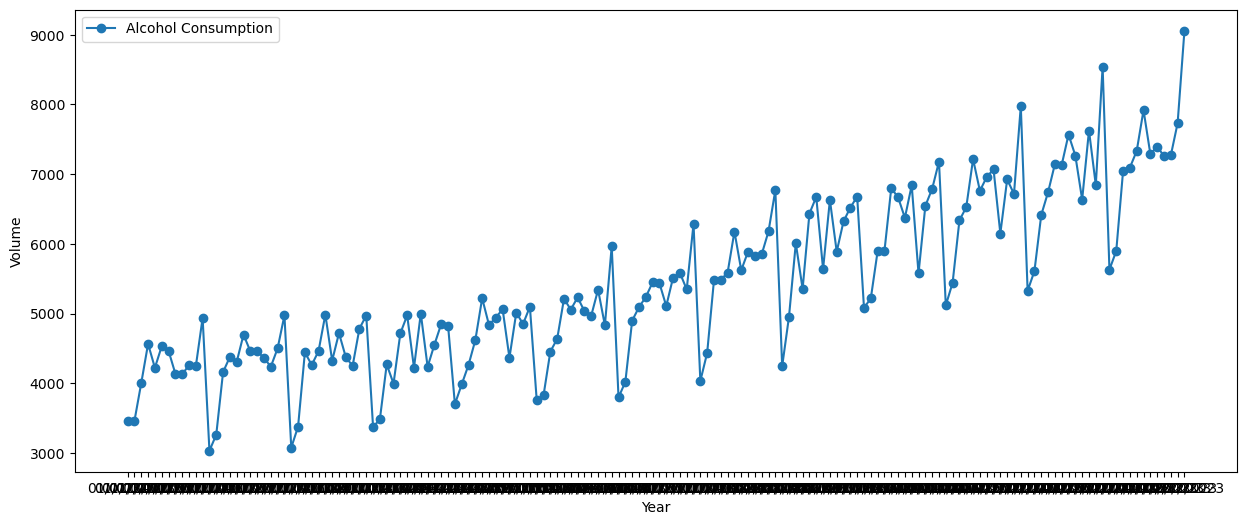

In [ ]:
# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(alcohol, marker='o', label='Alcohol Consumption')
plt.xlabel("Year")
plt.ylabel("Volume")
plt.legend(loc='best')
plt.show()

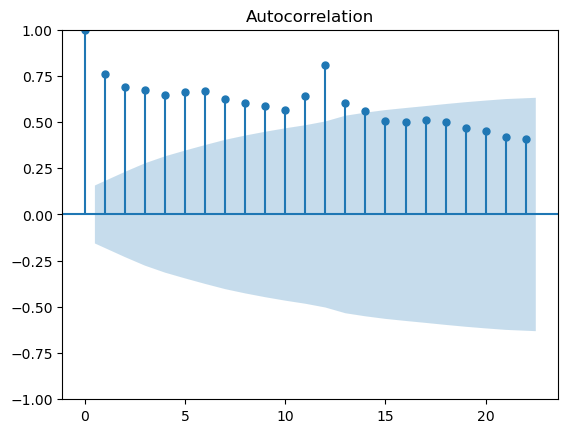

In [ ]:
plot_acf(alcohol)

In [ ]:
# Split the time series into a training and a validation set
alcohol_train = alcohol.iloc[:100,:]
alcohol_valid = alcohol.iloc[100:,:]

In [ ]:
# Plot the training and validation set with a different color
plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Alcohol")
plt.legend(loc = 'best') 


In [ ]:
# We will now apply the Triple Exponential Smoothing algorithm to the training data (additive model first)
# As you can see below, we need to indicate the length of the period in 'seasonal_periods', and 
# we specify sesaonal = 'add' for an additive model (trend will always be 'add' for us)
tes_model = ExponentialSmoothing(alcohol_train, initialization_method='estimated',seasonal_periods=12, trend = 'add', seasonal = 'add').fit()
tes_model.summary()

Dep. Variable:,Volume,No. Observations:,100
Model:,ExponentialSmoothing,SSE,5091984.565
Optimized:,True,AIC,1115.801
Trend:,Additive,BIC,1157.484
Seasonal:,Additive,AICC,1124.245
Seasonal Periods:,12,Date:,"Sun, 20 Apr 2025"
Box-Cox:,False,Time:,01:29:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1189014,alpha,True
smoothing_trend,0.1183055,beta,True


In [ ]:
# To see the evolution of the parameter a throughout the TES algorithm you can ask:
a_params = tes_model.level
a_params

Date
01/01/2011    4186.037603
01/02/2011    4194.824998
01/03/2011    4178.911505
01/04/2011    4227.854639
01/05/2011    4196.208435
                 ...     
01/12/2018    5832.037294
01/01/2019    5809.964933
01/02/2019    5841.255724
01/03/2019    5903.894764
01/04/2019    5880.532215
Length: 100, dtype: float64

In [ ]:
# To see the evolution of the parameter b throughout the TES algorithm you can ask:
b_params = tes_model.trend
b_params

Date
01/01/2011    -4.534399
01/02/2011    -2.958357
01/03/2011    -4.491021
01/04/2011     1.830535
01/05/2011    -2.129948
                ...    
01/12/2018    46.679516
01/01/2019    38.545790
01/02/2019    37.687483
01/03/2019    40.639390
01/04/2019    33.067607
Length: 100, dtype: float64

In [ ]:
# To see the evolution of the seasonal coefficients throughout the TES algorithm you can ask:
tes_model.season

Date
01/01/2011   -1056.656359
01/02/2011    -834.601289
01/03/2011     -81.826328
01/04/2011     -56.038583
01/05/2011     270.496575
                 ...     
01/12/2018     634.586174
01/01/2019   -1062.355430
01/02/2019    -836.007123
01/03/2019     -79.028569
01/04/2019     -57.785236
Length: 100, dtype: float64

In [ ]:
# the last 12 seasonal coefficients estimated
seasonal_coef = tes_model.season[-12:]
seasonal_coef

Date
01/05/2018     272.109120
01/06/2018     465.582423
01/07/2018     109.599565
01/08/2018     273.286137
01/09/2018     -11.282710
01/10/2018      63.764745
01/11/2018     258.352174
01/12/2018     634.586174
01/01/2019   -1062.355430
01/02/2019    -836.007123
01/03/2019     -79.028569
01/04/2019     -57.785236
dtype: float64

In [ ]:
# the predictions of the 2 first point of the validation set
first_point = (a_params[-1] + b_params[-1] + seasonal_coef[0], a_params[-1] + 2 * b_params[-1] + seasonal_coef[1])
first_point

(6185.70894262391, 6412.249852258383)

In [ ]:
# These predictions can be obtained by the following command : 
tes_model.forecast(2)

100    6185.708943
101    6412.249852
dtype: float64

In [ ]:
# the predictions for the whole validation set

predictions_data_add = tes_model.forecast(len(alcohol_valid))
predictions_data_add = pd.DataFrame(predictions_data_add,columns=['Volume'])
predictions_data_add.head()

,Volume
100,6185.708943
101,6412.249852
102,6089.334602
103,6286.088781
104,6034.587541


In [ ]:
predictions_data_add.index = alcohol_valid.index

In [ ]:
predictions_data_add.head()

,Volume
Date,
01/05/2019,6185.708943
01/06/2019,6412.249852
01/07/2019,6089.334602
01/08/2019,6286.088781
01/09/2019,6034.587541


In [ ]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_add, marker = 'o', color = 'Chocolate', label = 'TES ADDITIF algorithm predictions data')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best')


In [ ]:
# the squared prediction error on the validation set
EQM_TES_ADD = np.mean((predictions_data_add - alcohol_valid)**2)
EQM_TES_ADD

147469.28045140306

In [ ]:
# We will now try a model with a multiplicative seasonal composant. 
# For this, you need to specify seasonal = 'mul' in the call of the Exponenatial smoothing function : 
tes_model = ExponentialSmoothing(alcohol_train, initialization_method='estimated',seasonal_periods=12, trend = 'add', seasonal = 'mul').fit()
tes_model.summary()

Dep. Variable:,Volume,No. Observations:,100
Model:,ExponentialSmoothing,SSE,4320073.679
Optimized:,True,AIC,1099.361
Trend:,Additive,BIC,1141.044
Seasonal:,Multiplicative,AICC,1107.806
Seasonal Periods:,12,Date:,"Sun, 20 Apr 2025"
Box-Cox:,False,Time:,00:43:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1109050,alpha,True
smoothing_trend,0.0986007,beta,True


In [ ]:
# To see the evolution of the parameter a throughout the TES algorithm you can ask:
a_params = tes_model.level
a_params

Date
01/01/2011    4180.429719
01/02/2011    4181.648895
01/03/2011    4164.129139
01/04/2011    4209.405189
01/05/2011    4186.470639
                 ...     
01/12/2018    5667.358995
01/01/2019    5681.482902
01/02/2019    5745.417217
01/03/2019    5809.016473
01/04/2019    5795.333242
Length: 100, dtype: float64

In [ ]:
# To see the evolution of the parameter b throughout the TES algorithm you can ask:
b_params = tes_model.trend
b_params

Date
01/01/2011     2.456839
01/02/2011     2.334805
01/03/2011     0.377131
01/04/2011     4.804196
01/05/2011     2.069136
                ...    
01/12/2018    37.739325
01/01/2019    35.410828
01/02/2019    38.223264
01/03/2019    40.725355
01/04/2019    35.360629
Length: 100, dtype: float64

In [ ]:
seasonal_coef = tes_model.season[-12:]
seasonal_coef

Date
01/05/2018    1.064814
01/06/2018    1.109703
01/07/2018    1.050792
01/08/2018    1.065522
01/09/2018    1.019726
01/10/2018    1.051850
01/11/2018    1.064584
01/12/2018    1.172061
01/01/2019    0.772552
01/02/2019    0.828918
01/03/2019    0.999264
01/04/2019    0.998843
dtype: float64

In [ ]:
first_point = ((a_params[-1] + b_params[-1]) * seasonal_coef[0], (a_params[-1] + 2 * b_params[-1]) * seasonal_coef[1])
first_point

(6208.606032247345, 6509.576141666783)

In [ ]:
# These predictions can be obtained by the command:
tes_model.forecast(2)

100    6208.606032
101    6509.576142
dtype: float64

In [ ]:
# the predictions for the whole validation set

predictions_data_mult = tes_model.forecast(len(alcohol_valid))
predictions_data_mult = pd.DataFrame(predictions_data_mult, columns=['Volume'])
predictions_data_mult.index = alcohol_valid.index
predictions_data_mult.head()

,Volume
Date,
01/05/2019,6208.606032
01/06/2019,6509.576142
01/07/2019,6201.162488
01/08/2019,6325.766656
01/09/2019,6089.941709


In [ ]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_mult, marker = 'o', color = 'Orange', label = 'TES MULTIPLICATIF algorithm predictions data')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best')


In [ ]:
# the squared prediction error on the validation
EQM_TES_MULT = np.mean((predictions_data_mult - alcohol_valid)**2)
EQM_TES_MULT

187805.40501887913

## Classical AutoRegressive models (no trend no season)

In [ ]:
actual_BIC_value = (40, 1000)

for i in range (1, 40):
    arc_model = AutoReg(alcohol_train, lags = i, trend = 'c').fit()
    compare = min(actual_BIC_value[1], arc_model.bic)
    if compare == arc_model.bic:
        actual_BIC_value = (i, compare)

print(f"the best bic is : {actual_BIC_value}")

the best bic is : (39, 915.1339131336422)


In [ ]:
AR = AutoReg(alcohol_train, lags = 39, trend = 'c', period = 12).fit()

# the predictions for the whole validation set

predictions_data_arc = arc_model.forecast(len(alcohol_valid))
predictions_data_arc = pd.DataFrame(predictions_data_arc, columns=['Volume'])
predictions_data_arc.index = alcohol_valid.index
predictions_data_arc.head()

,Volume
Date,
01/05/2019,6661.273842
01/06/2019,6644.332205
01/07/2019,5989.246076
01/08/2019,6705.474573
01/09/2019,6208.162925


In [ ]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_arc, marker = 'o', color = 'yellow', label = 'AR')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best') 


In [ ]:
# the squared prediction error on the validation
EQM_AR = np.mean((predictions_data_arc - alcohol_valid)**2)
EQM_AR

6414212.902260701

## AutoRegressive models with trend

In [ ]:
# classical AR models and select the best order for this time series
actual_BIC_value = (40, 1000)

for i in range (1, 40):
    arc_model = AutoReg(alcohol_train, lags = i, trend = 'ct').fit()
    compare = min(actual_BIC_value[1], arc_model.bic)
    if compare == arc_model.bic:
        actual_BIC_value = (i, compare)

print(f"the best bic is : {actual_BIC_value}")

the best bic is : (39, 917.728760117783)


In [ ]:
ART = AutoReg(alcohol_train, lags = 39, trend = 'c',seasonal=True, period = 12).fit()

# the predictions for the whole validation set

predictions_data_arc_with_trend = ART.forecast(len(alcohol_valid))
predictions_data_arc_with_trend = pd.DataFrame(predictions_data_arc_with_trend, columns=['Volume'])
predictions_data_arc_with_trend.index = alcohol_valid.index
predictions_data_arc_with_trend.head()

,Volume
Date,
01/05/2019,6489.815305
01/06/2019,6537.321995
01/07/2019,5988.713436
01/08/2019,6794.006385
01/09/2019,6416.752457


In [ ]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_arc, marker = 'o', color = 'yellow', label = 'AR models predictions data')
plt.plot(predictions_data_arc_with_trend, marker = 'o', color = 'RosyBrown', label = 'ART models')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best') 



In [ ]:
# the squared prediction error on the validation
EQM_ART = np.mean((predictions_data_arc_with_trend - alcohol_valid)**2)
EQM_ART

6286820.593147374

## AutoRegressive models with seasonal component

In [ ]:
# We will now apply a seasonal AR model of order 1 without trend (to start):
# For this, you need to specify seasonal = True and to indicate the period of the seasonal component (12 here)
ARS = AutoReg(alcohol_train, lags = 1, trend = 'c',seasonal=True, period = 12).fit()
ARS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 Volume   No. Observations:                  100
Model:               Seas. AutoReg(1)   Log Likelihood                -709.913
Method:               Conditional MLE   S.D. of innovations            314.789
Date:                Sun, 20 Apr 2025   AIC                           1447.827
Time:                        00:49:46   BIC                           1484.158
Sample:                             1   HQIC                          1462.527
                                  100                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -875.7049    339.897     -2.576      0.010   -1541.891    -209.518
s(2,12)     1778.0128    188.232      9.446      0.000    1409.086    2146.940
s(3,12)     2363.0943    179.806     13.142      0.000    2010.680    2715.508
s(4,12)     1752.0644    160.238     10.934      0.000    1438.005    2066.124
s(5,12)     1942.7107    165.101     11.767      0.000    1619.118    2266.303
s(6,12)     1962.1795    161.390     12.158      0.000    1645.861    2278.498
s(7,12)     1532.9348    159.053      9.638      0.000    1221.197    1844.673
s(8,12)     1826.7000    161.817     11.289      0.000    1509.545    2143.855
s(9,12)     1550.6894    160.694      9.650      0.000    1235.734    1865.645
s(10,12)    1881.1452    163.518     11.504      0.000    1560.657    2201.634
s(11,12)    1809.3858    161.187     11.225      0.000    1493.466    2125.306
s(12,12)    2288.6354    160.438     14.265      0.000    1974.183    2603.088
Volume.L1      0.8217      0.059     14.015      0.000       0.707       0.937
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2171           +0.0000j            1.2171            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# classical AR models and select the best order for this time series
actual_BIC_value = (40, 1000)

for i in range (1, 40):
    ARS = AutoReg(alcohol_train, lags = i, trend = 'c',seasonal=True, period = 12).fit()
    compare = min(actual_BIC_value[1], ARS.bic)
    if compare == ARS.bic:
        actual_BIC_value = (i, compare)

print(f"the best bic is : {actual_BIC_value}")

the best bic is : (39, 916.5088208533675)


In [ ]:
ARS = AutoReg(alcohol_train, lags = 39, trend = 'c',seasonal=True, period = 12).fit()

# the predictions for the whole validation set

predictions_data_arc_with_season = ARS.forecast(len(alcohol_valid))
predictions_data_arc_with_season = pd.DataFrame(predictions_data_arc_with_season, columns=['Volume'])
predictions_data_arc_with_season.index = alcohol_valid.index
predictions_data_arc_with_season.head()

,Volume
Date,
01/05/2019,6489.815305
01/06/2019,6537.321995
01/07/2019,5988.713436
01/08/2019,6794.006385
01/09/2019,6416.752457


In [ ]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_arc, marker = 'o', color = 'yellow', label = 'AR models predictions data')
plt.plot(predictions_data_arc_with_trend, marker = 'o', color = 'RosyBrown', label = 'ART models')
plt.plot(predictions_data_arc_with_season, marker = 'o', color = 'MediumSlateBlue', label = 'ARS models')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best') 



In [ ]:
EQM_ARS = np.mean((predictions_data_arc_with_season - alcohol_valid)**2)
EQM_ARS

6286820.593147374

## AutoRegressive models with seasonal component

In [ ]:
# classical AR models and select the best order for this time series
actual_BIC_value = (40, 1000)

for i in range (1, 40):
    ARTS = AutoReg(alcohol_train, lags = i, trend = 'ct',seasonal=True, period=12).fit()
    compare = min(actual_BIC_value[1], ARTS.bic)
    if compare == ARTS.bic:
        actual_BIC_value = (i, compare)

print(f"the best bic is : {actual_BIC_value}")

the best bic is : (39, 919.0001601730896)


In [ ]:
ARTS = AutoReg(alcohol_train, lags = 39, trend = 'ct',seasonal=True, period = 12).fit()

# the predictions for the whole validation set

predictions_data_ARTS = ARTS.forecast(len(alcohol_valid))
predictions_data_ARTS = pd.DataFrame(predictions_data_ARTS, columns=['Volume'])
predictions_data_ARTS.index = alcohol_valid.index
predictions_data_ARTS.head()

,Volume
Date,
01/05/2019,6394.328076
01/06/2019,6547.954594
01/07/2019,5855.674792
01/08/2019,6792.705846
01/09/2019,6327.441045


In [ ]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_arc, marker = 'o', color = 'yellow', label = 'AR models predictions data')
plt.plot(predictions_data_arc_with_trend, marker = 'o', color = 'RosyBrown', label = 'ART models')
plt.plot(predictions_data_arc_with_season, marker = 'o', color = 'DarkMagenta', label = 'ARS models')
plt.plot(predictions_data_ARTS, marker = 'o', color = 'MediumSlateBlue', label = 'ARTS models')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best') 

In [ ]:
# the squared prediction error on the validation
EQM_ARTS = np.mean((predictions_data_ARTS - alcohol_valid)**2)
EQM_ARTS

4243192.886755749

In [ ]:
# compare the differents models 

# Best model

compare = min(EQM_TES_ADD, EQM_TES_MULT, EQM_AR, EQM_ART, EQM_ARS, EQM_ARTS)

if compare == EQM_TES_ADD:
    print("le meilleur modèle est : La prédictions TES ADDITIF algorithm")
elif compare == EQM_TES_MULT:
    print("le meilleur modèle est : La prédiction TES MULTIPLICATIF algorithm")
elif compare == EQM_AR:
    print("le meilleur modèle est : La prédiction Auto-regressive Classic")
elif compare == EQM_ART:
    print("le meilleur modèle est : La prédiction Auto-regressive avec tendance")
elif compare == EQM_ARS:
    print("le meilleur modèle est : La prédiction Auto-regressive avec saison")
else: 
    print("le meilleur modèle est : La prédiction par Auto-regressive avec tendance et saison")

le meilleur modèle est : La prédictions TES ADDITIF algorithm


In [ ]:
# Sauvegarder les résultats dans un fichier
file_name = "results.txt"
with open(file_name, "w") as file:
    file.write("Résultats des prédictions :\n")
    file.write(pred.to_string(index=False))  # Écrire les prédictions dans le fichier

# Ouvrir le fichier et écrire des résultats supplémentaires
with open(file_name, "a") as file:  # Mode 'a' pour ajouter du contenu
    file.write("\n\nAutres résultats :\n")
    file.write(f"Erreur minimale : {min_err}\n")
    file.write(f"Meilleure variable : {var}\n")
    file.write(f"Variance analysis :\n{variance_analysis.to_string()}\n")

In [ ]:
# Étape 5 : Sauvegarde dans un fichier texte
output_file = 'Predictions_ARS_2024_2025_Loic_&_Cyril.txt'

# Générer un index futur pour les prédictions (par exemple, pour 2024-2025)
future_index = pd.date_range(start='2024-01', end='2025-12', freq='M')

# Exemple de prédictions futures (remplacez par vos données réelles)
future_predictions = [value for value in range(len(future_index))]  # Remplacez par vos prédictions

# Ouvrir le fichier et écrire les résultats
with open(output_file, 'w') as f:
    f.write("Date\tVolume\n")  # En-têtes
    for date, value in zip(future_index, future_predictions):
        f.write(f"{date.strftime('%Y-%m')}\t{value:.2f}\n")  # Date + valeur prédite avec 2 décimales

print(f"✅ Les prédictions ont été enregistrées dans : {output_file}")

✅ Les prédictions ont été enregistrées dans : Predictions_ARS_2024_2025_Loic_&_Cyril.txt
